# Handwritten Digit Recognition

In [1]:
%pip install keras
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install tensorflow
%pip install pillow
%pip install scikit-learn
%pip install pygame
%pip install ipywidgets
%pip install ipython

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pygame


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [2]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

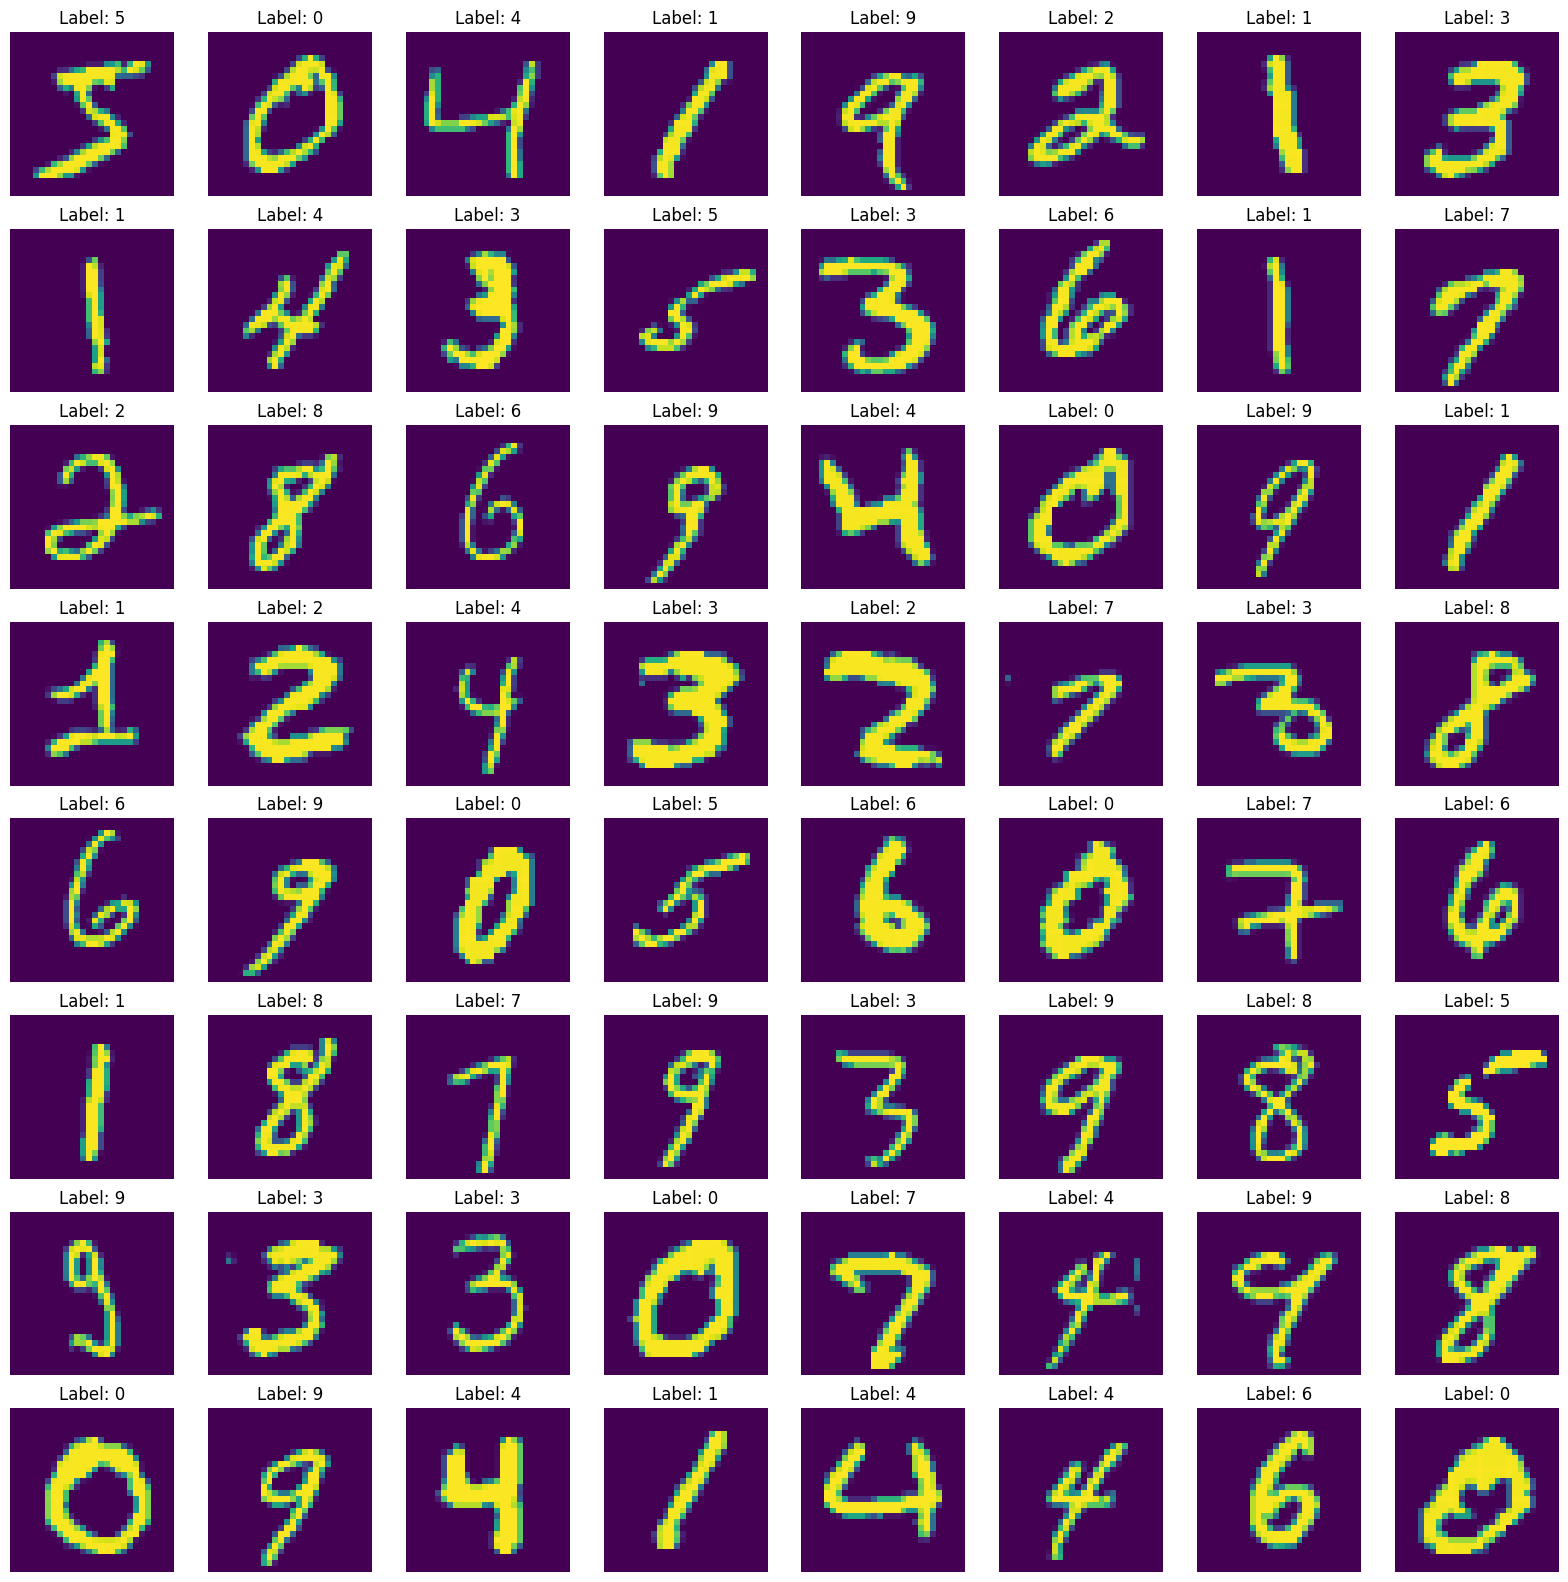

In [3]:
# plot
fig, axes = plt.subplots(8,8, figsize=(20,20))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

In [14]:
# reshape the data for CNN

shape_train = X_train.shape[0]
shape_test = X_test.shape[0]
X_train_cnn = X_train.reshape(shape_train, 28, 28, 1)
X_test_cnn = X_test.reshape(shape_test, 28, 28, 1)

y_train_cnn = keras.utils.to_categorical(y_train, 10)
y_test_cnn = keras.utils.to_categorical(y_test, 10)
print(X_train_cnn.shape, X_test_cnn.shape, y_train_cnn.shape, y_test_cnn.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [27]:
# Define the model
def model_digit_recognition():
    model = models.Sequential()

    # First convolutional block (Conv1 + Conv2 + Pooling)
    model.add(layers.Input(shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))  # (28x28)
    model.add(layers.MaxPooling2D((2, 2)))  # Downsample to (14x14)

    # Second convolutional block (Conv3 + Conv4 + Pooling)
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))  # (14x14)
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))  # (14x14)
    model.add(layers.MaxPooling2D((2, 2)))  # Downsample to (7x7)

    # Flatten and fully connected layers (FC1, FC2, FC3)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 outputs for 10 classes (digits 0-9)

    return model

# Create the model
model = model_digit_recognition()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # for digit classification
              metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3 , mode='min', verbose=1, restore_best_weights=True)
# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1, monitor='val_loss', mode='min')

model.summary()

# Fit the model using the augmented data generator
history = model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=64, validation_split = 0.2, callbacks=[model_checkpoint, early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                  

In [28]:
test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f"Test accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, Loss: {test_loss:.4f}")

313/313 [==============================] - 2s 7ms/step - loss: 0.0260 - accuracy: 0.9934 - auc: 0.9993 - precision: 0.9938 - recall: 0.9929
Test accuracy: 0.9934, AUC: 0.9993, Precision: 0.9938, Recall: 0.9929, Loss: 0.0260


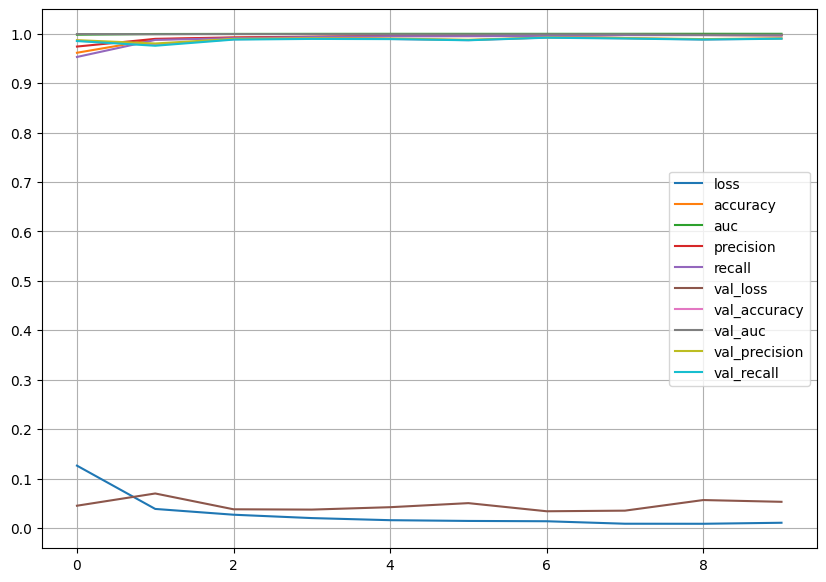

In [41]:
graph = pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [21]:
# Load the best model
model = load_model('best_model.keras')

# Test the model
test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(X_test_cnn, y_test_cnn, verbose=1)

print(f"Test accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, Loss: {test_loss:.4f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0260 - accuracy: 0.9934 - auc: 0.9993 - precision: 0.9938 - recall: 0.9929
Test accuracy: 0.9934, AUC: 0.9993, Precision: 0.9938, Recall: 0.9929, Loss: 0.0260


313/313 [==============================] - 1s 3ms/step


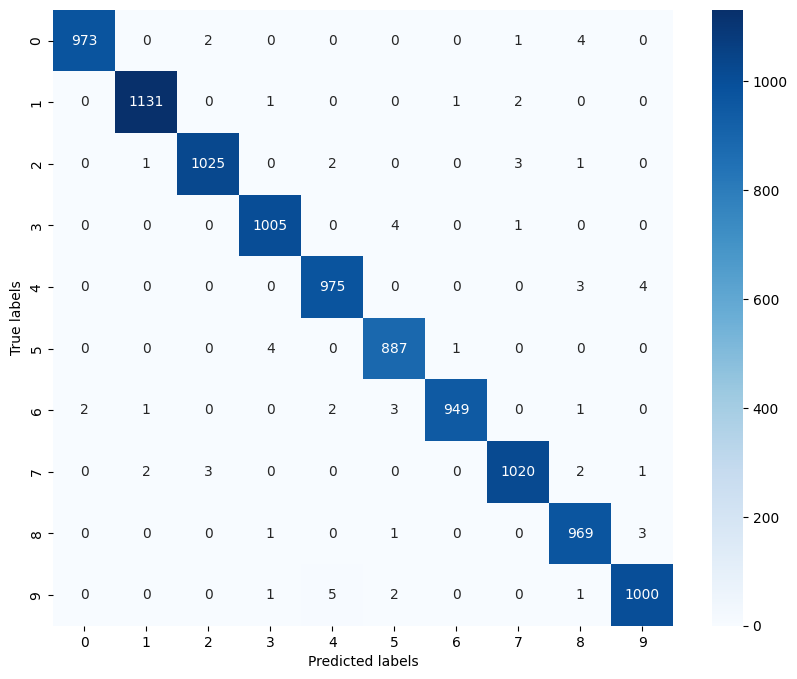

In [22]:
# confusion matrix
y_pred = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_cnn, axis=1)
confusion = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(confusion):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

plot_confusion_matrix(confusion)

In [17]:
def cnn_lstm():
    model = models.Sequential()
    
    # Backbone: Convolutional layers with downsampling
    model.add(layers.Input(shape = (28, 28, 1)))
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # SPP Layer (Spatial Pyramid Pooling)
    model.add(layers.GlobalMaxPooling2D())

    # LSTM layer
    model.add(layers.RepeatVector(1))  # Reshaping for LSTM compatibility
    model.add(layers.LSTM(128, return_sequences=False)) # LSTM layer with 128 units and return only the last output

    # Fully connected layers as the detection head
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer for 10 classes (digits 0-9)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    return model

# Instantiate the CNN-LSTM model
cnn_lstm_model = cnn_lstm()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3 , mode='min', verbose=1, restore_best_weights=True)
# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model_cnn-lstm.keras', save_best_only=True, verbose=1, monitor='val_loss', mode='min')

# Model summary
cnn_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

In [18]:
# Split the data into training and validation sets
X_train_cnn_train, X_train_cnn_val, y_train_cnn_train, y_train_cnn_val = train_test_split(X_train_cnn, y_train_cnn, test_size=0.1, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.1, 
    width_shift_range=0.1, 
    height_shift_range=0.1,
    horizontal_flip=False,
    shear_range=0.1
)

# Fit the model using the training data and validate using the validation data
hist = cnn_lstm_model.fit(datagen.flow(X_train_cnn_train, y_train_cnn_train, batch_size=32),
                                    epochs=10,
                                    validation_data=(X_train_cnn_val, y_train_cnn_val),
                                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.3393 - accuracy: 0.8944 - auc: 0.9917 - precision: 0.9564 - recall: 0.8594
Epoch 1: val_loss improved from inf to 0.06815, saving model to best_model_cnn-lstm.keras
1688/1688 [==============================] - 33s 17ms/step - loss: 0.3391 - accuracy: 0.8945 - auc: 0.9918 - precision: 0.9564 - recall: 0.8595 - val_loss: 0.0682 - val_accuracy: 0.9812 - val_auc: 0.9983 - val_precision: 0.9833 - val_recall: 0.9798
Epoch 2/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.9699 - auc: 0.9968 - precision: 0.9747 - recall: 0.9651
Epoch 2: val_loss did not improve from 0.06815
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1213 - accuracy: 0.9699 - auc: 0.9968 - precision: 0.9747 - recall: 0.9651 - val_loss: 0.0757 - val_accuracy: 0.9795 - val_auc: 0.9978 - val_precision: 0.9805 - val_recall: 0.9783
Epoch 3/10
1688/1688 [==============================] - ETA: 0s - l

In [19]:
model = load_model('best_model_cnn-lstm.keras')

# Test the model
test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(X_test_cnn, y_test_cnn, verbose=1)

print(f"Test accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, Loss: {test_loss:.4f}")


313/313 [==============================] - 3s 7ms/step - loss: 0.0422 - accuracy: 0.9890 - auc: 0.9988 - precision: 0.9910 - recall: 0.9878
Test accuracy: 0.9890, AUC: 0.9988, Precision: 0.9910, Recall: 0.9878, Loss: 0.0422


313/313 [==============================] - 1s 3ms/step


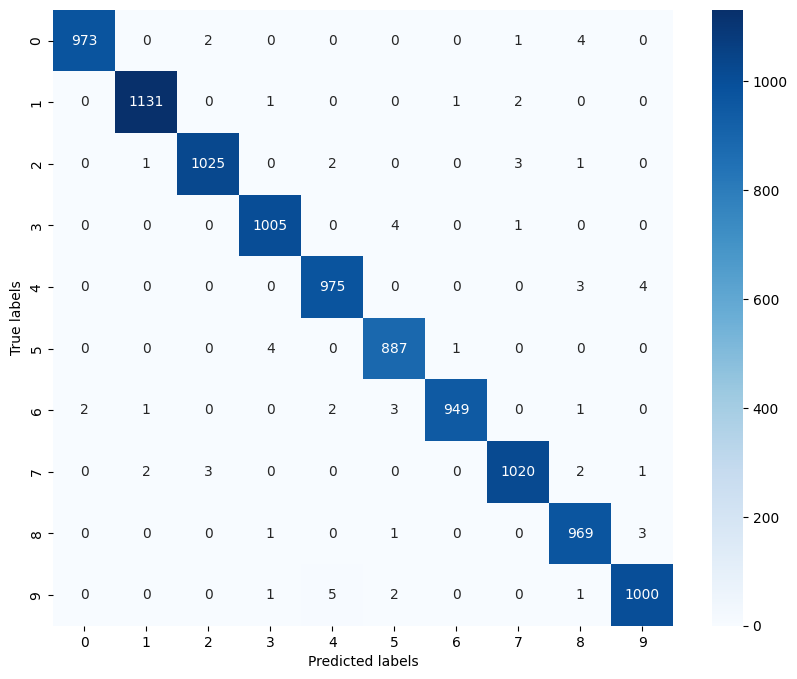

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_cnn, axis=1)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(confusion_matrix_result)


In [5]:
%pip install ipywidgets
%pip install ipython

import io
from ipywidgets import FileUpload, Button, Output
from IPython.display import display, clear_output

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
model = load_model('best_model_cnn-lstm.keras')

# Drawing and Predicting Digits
In this section, we provide functionality to draw digits using **Pygame** and predict the drawn digit using our trained model. Additionally, we offer an option to upload an image of a digit and predict it using the model. This interactive approach allows users to test the model with custom inputs and visualize the predictions.


In [7]:
# function to draw the digit on the screen
def draw_digit():
    # initialize the pygame
    pygame.init()
    
    # set the screen size
    screen = pygame.display.set_mode((280, 280)) 
    
    # set the title of the screen
    pygame.display.set_caption('Draw Digit')
    
    # set the color
    color = (255, 255, 255)
    
    # set the thickness
    thickness = 8
    
    # fill the screen with black color
    screen.fill((0, 0, 0))
    
    # set the running variable
    running = True
    
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False                    
            if event.type == pygame.MOUSEBUTTONDOWN:
                pygame.draw.circle(screen, color, event.pos, thickness)
            if event.type == pygame.MOUSEMOTION and event.buttons[0]: 
                pygame.draw.circle(screen, color, event.pos, thickness)
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_RETURN:
                    # get the screen as an image
                    pygame.image.save(screen, 'digit7.png')
                    
                    # quit the pygame
                    running = False
        
        # update the display
        pygame.display.flip()
    
    # quit pygame
    pygame.quit()
    
           
# load the image
def load_image():
    img = Image.open('digit7.png')
    img.show()
    
    return img

# create a button
button = Button(description='Draw Digit')

# display the button
display(button)

# set the on_click function to the button
button.on_click(draw_digit)

# load the image
load_image()



Button(description='Draw Digit', style=ButtonStyle())

The image is saved as `digit7.png` in the project folder where `main.ipynb` is located. In the next step, we will preprocess and predict the image.

In [9]:
# Function to preprocess the input image
def preprocess_image(image):
    img = image.convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to match the model's input size (28x28)

    # Convert image to a numpy array
    img_array = np.array(img) 
    
    # Invert colors if background is white and digit is black
    if np.mean(img_array) > 127:  # Assuming white background if average pixel value > 127
        print('Inverting colors')
        img_array = 255 - img_array
    else:
        print('Colors are okay')
        
    # Normalize pixel values
    img_array = img_array.astype('float32') / 255.0

    # Reshape the image to add batch dimension (1, 28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [10]:
# Function to predict the digit from user input
def predict_digit(image,*args, **kwargs):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)  # Assuming model is already loaded
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Image Upload and Testing of Real Data **Using Widgets**

In [11]:
# Create widgets
upload = FileUpload(accept='image/*', multiple=False)
predict_button = Button(description="Predict", disabled=True)
image_output = Output()
prediction_output = Output()

# Variable to hold the uploaded image
uploaded_image = None

# Function to handle file upload
def handle_upload(change): 
    global uploaded_image
    
    # Check if the file is uploaded correctly
    if upload.value:
        # Extract the uploaded file's content from the widget
        uploaded_file = upload.value[::-1][0]  # Reverse the order of the uploaded files and get the first file (latest) because the file is uploaded as a list
        image_data = uploaded_file['content']  # Get the content of the uploaded file as bytes
        
        # Convert the file content to a PIL Image
        uploaded_image = Image.open(io.BytesIO(image_data))
        
        # Display the uploaded image
        with image_output:
            clear_output(wait=True)
            plt.imshow(uploaded_image, cmap='gray')
            plt.title("Uploaded Image")
            plt.axis('off')  # Hide axis
            plt.show()

        # Enable the predict button after upload
        predict_button.disabled = False

# Function to handle prediction when the button is clicked
def on_predict_button_clicked(b):
    if uploaded_image is not None:
        predicted_digit = predict_digit(uploaded_image)
        
        # Display the prediction result
        with prediction_output:
            clear_output(wait=True)
            print(f"Predicted Digit: {predicted_digit}")

# Attach handlers to the widgets
upload.observe(handle_upload, names='value') 
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(upload)
display(predict_button)
display(image_output)  # Display the image output widget
display(prediction_output)  # Display the prediction output widget

FileUpload(value=(), accept='image/*', description='Upload')

Button(description='Predict', disabled=True, style=ButtonStyle())

Output()

Output()

Colors are okay
1/1 [==============================] - 3s 3s/step


The cell with widgets to upload and predict the image takes longer (3s/step) compared to the cell where the image is directly opened, preprocessed, and predicted (20ms/step) due to several factors:

1. **Widget Overhead**: The use of widgets introduces additional overhead. The `FileUpload` widget, `Button` widget, and `Output` widget all require interaction with the Jupyter Notebook's frontend, which adds latency.

2. **Event Handling**: The widget-based approach involves event handling (e.g., file upload, button click), which requires communication between the frontend and backend. This communication can introduce delays.

3. **Image Display**: The widget-based approach includes displaying the uploaded image using `plt.imshow()`, which adds time for rendering the image in the notebook.

4. **Interactivity**: The interactive nature of widgets, including waiting for user actions (e.g., file upload, button click), contributes to the overall time taken.

In contrast, the direct approach of opening, preprocessing, and predicting the image is a straightforward sequence of operations without the additional overhead of widgets and interactivity, resulting in much faster execution (20ms/step).

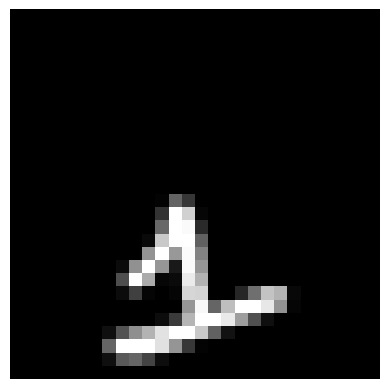

1/1 [==============================] - 0s 20ms/step
Predicted Digit: 1


In [ ]:
digit = Image.open('digit7.png')
digit = digit.convert('L') # Convert to grayscale
digit = digit.resize((28, 28))
digit = np.array(digit)

if np.mean(digit) > 127:  # Assuming white background if average pixel value > 127
        print('Inverting colors')
        digit = 255 - digit

digit = digit.astype("float32")/255.0
plt.imshow(digit, cmap='gray')
plt.axis('off')
plt.show()

digit = digit.reshape(1, 28, 28, 1)

prediction = model.predict(digit)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")
